In [1]:
import os
from scipy.io import wavfile
from tqdm import tqdm
import pandas as pd
from python_speech_features import mfcc, logfbank
import librosa
import pydub 
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

In [3]:
def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

In [4]:
def calc_fft(sig, rate):
    n = len(sig)
    freq = np.fft.rfftfreq(n, d=1/rate)
    mag = abs(np.fft.rfft(sig)/n)
    
    return mag, freq

In [5]:
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [6]:
#data_folder = Path("Gelabelt")
#file = data_folder / "f1.mp3"
#os.path.abspath("Gelabelt")

#data_folder = os.path.join("Gelabelt", "f2.mp3")
#os.path.abspath(data_folder)
sr, signal = read('f1.mp3')
print(sr)
print(signal)

44100
[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [ 3  2]
 [ 1  1]
 [-3 -1]]


In [7]:
sec = signal.shape[0]/sr
print (sec)


10.840816326530613


In [8]:
signal2, sr2 = librosa.load('f1.mp3', sr=44100)
print(sr2)
print(signal2)

44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.6293945e-05
  3.0517578e-05 -6.1035156e-05]


In [9]:
mag, freq = calc_fft(signal2, sr2)
#print(mag)

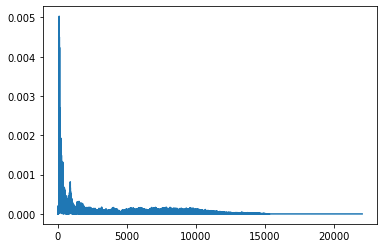

In [10]:
plt.plot(freq, mag)
plt.show()